## SciPyとOpenOptによる非線形最適化のモデリング


* 非線形最適化モデラー（ソルバー）
* SciPyによるモデリング
* openoptによるモデリング


## 非線形最適化モデラー（ソルバー）
-----------------
*  SciPy（BSDライセンス）のoptimizeサブモジュール
  * 非線形問題に対する種々のアルゴリズム



#### SciPyのoptimizeサブモジュールの minimize(f,x0)
-----

複数の変数をもつ関数fを初期解x0からの探索で最小化

引数methodで探索のためのアルゴリズムを設定 

* 'Nelder-Mead'：Nelder–Mead法(単体法)

* 'Powell'：Powellの共役方向法

* 'CG'：共役勾配法(conjugate gradient)

* 'BFGS'：Broyden–Fletcher–Goldfarb–Shanno(BFGS)法

* 'Newton-CG'：Newton共役勾配法

* 'L-BFGS-B'：記憶制限付きBFGS法

* 'TNC'：打ち切りNewton共約勾配法

* 'COBYLA'：Constrained Optimization BY Linear Approximation

* 'SLSQP'：Sequential Least SQuares Programming

* 'dogleg'：ドッグレッグ信頼領域法

* 'trust-ncg'：信頼領域Newton共約勾配法




### 他の引数

* jac : 勾配ベクトル(Jacobian)

* hess : Hesse行列(Hessian)

* bounds :上下限（限界値）制約

* constraints: 一般の制約式（$=0$ もしくは $\geq 0$）

 - 制約の種類は文字列 'type' をキーとし，値を制約の種類を表す文字列 ('eq', 'ineq')．

 - 制約関数は文字列 'fun'をキーとし，制約を表す関数を値

 - Jacobianは文字列 'jac'をキーとし，Jacobianを表す関数を値

   不等式 $x_0 +2x_1 \geq 10$ を表す制約

`{'type': 'ineq', 'fun': lambda x:  x[0] + 2*x[1] -10}`






#### **Rosenbrock関数** 

$$f(x_1, x_2, \ldots, x_n) = \sum_{i=1}^{n-1} (100(x_i^2 - x_{i+1})^2 + (1-x_i)^2)$$

----
関数(rosen)，Jacovian(rosen_der)，Hessian(rosen_hess)

    sum(100.0*(x[1:] - x[:-1]**2.0)**2.0 + (1 - x[:-1])**2.0)

x=(1,1,...,1) のとき最小 

* 2次元の場合の描画

* 単体法(勾配情報なし）

* BFGS（準Newton法）（勾配情報のみ使う）

* 信頼領域Newton共役勾配法（勾配とHessian）



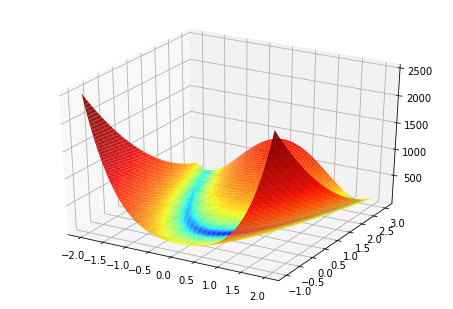

In [1]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import LogNorm
from pylab import *
%matplotlib inline
ax = Axes3D(figure())
s = .05
X = np.arange(-2, 2.+s, s) 
Y = np.arange(-1, 3.+s, s)
X, Y = np.meshgrid(X, Y)   
Z = (1.-X)**2 + 100.*(Y-X*X)**2 
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,  norm=LogNorm(), cmap=cm.jet, linewidth=0.2); None

In [2]:
#5次元の場合の比較
from scipy.optimize import minimize, rosen, rosen_der, rosen_hess

x0 = [2.0 for i in range(5)]
res = minimize(rosen, x0, method='Nelder-Mead')
print(res.x)

res = minimize(rosen, x0, jac=rosen_der, method='BFGS')
print(res.x)

res = minimize(rosen, x0, jac=rosen_der, hess=rosen_hess, method='trust-ncg')
print(res.x)


[ 1.00000047  1.00000079  1.0000027   1.00000292  1.00000473]
[ 0.99999999  0.99999998  0.99999995  0.99999992  0.99999985]
[ 1.          1.          1.          0.99999999  0.99999993]


|手法名|引数|Jacobian|Hessian|限界値|制約|
|:----:|:--:|:------:|:-----:|:----:|:--:|
|Nedler–Mead|'Nelder-Mead'|||||
|共役方向|'Powell'|||||
|共役勾配|'CG'|○||||
|BFGS|'BFGS'|○||||
|Newton共役勾配|'Newton-CG'|○|○|||
|記憶制限付きBFGS|'L-BFGS-B'|○||○||
|打ち切りNewton共役勾配|'TNC'|○||○||
|線形近似|'COBYLA'|○|||○|
|逐次最小2 乗|'SLSQP'|○||○|○|
|ドッグレッグ信頼領域|'dogleg'|○|○|||
|信頼領域Newton共役勾配|'trust-ncg'|○|○| | |  

## 制約付き最適化の例
----

半径 $\sqrt{2}$ の円内の制約の下で $x+y$ を最大化

* COBYLA (線形近似法;Constrained Optimization BY Linear Approximation）で求解

* SLSQP（逐次最小2乗法;Sequential Least SQuares Programming）で求解

In [3]:
def f(x):
    return -x[0]-x[1]
bnds = ((0, None), (0, None))
f = lambda x: -x[0]-x[1]
con  = {'type': 'ineq', 'fun': lambda x:  -x[0]**2 - x[1]**2 + 2 }
res = minimize(fun=f, x0=[2,2], method='COBYLA',constraints=con)
print("COBYLA========= \n",res)
res = minimize(fun=f, x0=[2,2], method='SLSQP',constraints=con)
print("SLSQP========== \n",res)

COBYLA========= 
      fun: -2.000000006134913
   maxcv: 2.0000961775679116e-08
 message: 'Optimization terminated successfully.'
    nfev: 47
  status: 1
 success: True
       x: array([ 1.00006218,  0.99993783])
SLSQP========== 
      fun: -2.000000092931198
     jac: array([-1., -1.])
 message: 'Optimization terminated successfully.'
    nfev: 20
     nit: 5
    njev: 5
  status: 0
 success: True
       x: array([ 1.00000005,  1.00000005])



* openopt（BSDライセンス）のモデラー・ソルバー
  * メインソルバーは自前のPythonソルバー，その他様々なソルバーと連携
  * Gurobiと同様のインターフェイスをもつ**myopenopt**を利用


#### 例題：**Rosenbrock関数** 

$$ \displaystyle\sum_{i=1}^{n-1} (100(x_i^2 - x_{i+1})^2 + (1-x_i)^2)$$ 

$x=(1,1,...,1)$ のとき最小値  $f^* =0$ 

* 計算過程のGUI付き(メソッドoptimizeの引数 plot で指定）
* 非線形最適化は，初期解に依存（addVarの引数 init で指定）
* sin, cos, sqrt, exp, sum などの関数定義を含む（mathやnumpyを使わない）
* print(model)でモデル内の数式の表示

In [4]:
from myopenopt import *
model=Model(name='Resenbrock')
n=5
x={}
for i in range(n):
    x[i]=model.addVar(name='x[{0}]'.format(i), init =3.0 )
model.setObjective(
    sum( 100*(x[i]**2-x[i+1])**2 + (1-x[i])**2 for i in range(n-1)),GRB.MINIMIZE)
result = model.optimize(plot=True)
print('Result=',model.Status)
for v in model.getVars():
    print(v.VarName,v.X)  

ModuleNotFoundError: No module named 'myopenopt'

## Beale 関数
---------------

 $(x_1, x_2) = \displaystyle\sum_{i=1}^{3} \left\{ c_i - x_1 (1- (x_2)^i \right\}^2$

$c_1=1.5, c_2=2.25, c_3=2.625$ 

$x_2=1$ 付近で湾曲

$x=(3,0.5)$ のとき最小値  $f^* =0$ 


In [ ]:
from pylab import *
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import LogNorm
ax = Axes3D(figure())
c ={1: 1.5, 2:2.25, 3:2.625}
s = .5
X = np.arange(-5, 5.+s, s) 
Y = np.arange(-5, 5.+s, s)
X, Y = np.meshgrid(X, Y)   
Z = sum( (c[i]-X*(1-Y**i))**2 for i in range(1,4)) 
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,  norm=LogNorm(), cmap=cm.jet, linewidth=0.2); None

In [ ]:
from myopenopt import *
%matplotlib inline
model=Model('Beale')
c ={1: 1.5, 2:2.25, 3:2.625}
x={}
for i in range(1,3):
    x[i]=model.addVar(name='x[{0}]'.format(i))

model.setObjective(sum( (c[i]-x[1]*(1-x[2]**i))**2 for i in range(1,4)),GRB.MINIMIZE )

result =model.optimize(plot=True)

print(model)

print("Result=",model.Status)
for v in model.getVars():
    print(v.VarName,v.X)  

## Powell関数
-------------
 $$ (x_1-10x_2)^2 + 5(x_3-x_4)^2 + (x_2-2x_3)^4+ 10(x_1-x_4)^4$$


最適解 $(0,0,0,0)$,  $f^*=0$

最適解におけるHesse行列が特異

In [ ]:
from myopenopt import *
%matplotlib inline
model=Model(name='Powell')
x={}
for i in range(1,5):
    x[i]=model.addVar(name='x[{0}]'.format(i))

model.setObjective(
    (x[1]-10*x[2])**2+5*(x[3]-x[4])**2+(x[2]-2*x[3])**4+10*(x[1]-x[4])**4,GRB.MINIMIZE )

result =model.optimize(plot=True)

print("Result=",model.Status)
for v in model.getVars():
    print(v.VarName,v.X)  

## Ackley関数
--------------

$$f(x,y) = -20\exp\left(-0.2\sqrt{0.5\left(x^{2}+y^{2}\right)}\right)$$ 
$$-\exp\left(0.5\left(\cos\left(2\pi x\right)+\cos\left(2\pi y\right)\right)\right) + e + 20$$

最適解 $x=(0,0),  f^*= 0$

$-5 \le x,y \le 5$

In [ ]:
from pylab import *
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import LogNorm
ax = Axes3D(figure())
s = 0.1
X = np.arange(-3, 3.+s, s) 
Y = np.arange(-3, 3.+s, s)
X, Y = np.meshgrid(X, Y)   
Z = -20*exp(-0.2 * sqrt( 0.5*(X**2 +Y**2) ))- exp(
    0.5*(cos(2*math.pi*X)+cos(2*math.pi*Y)))+exp(1)+20
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,  cmap=cm.jet, linewidth=0.2);None

In [ ]:
from myopenopt import *
model = Model()
x={}
for i in range(2):
    x[i]=model.addVar(name='x[{0}]'.format(i),init=1.0)

model.setObjective(
-20*exp(-0.2 * sqrt( 0.5*(x[0]**2 +x[1]**2) ))
            - exp(0.5*(cos(2*math.pi*x[0])+cos(2*math.pi*x[1] )))+exp(1)+20,GRB.MINIMIZE )

result =model.optimize(plot=True)

print("Result=",model.Status)
for v in model.getVars():
    print(v.VarName,v.X) 

## 制約付きWeber問題

 \begin{array}{ll}
  \mbox{minimize}    & \displaystyle\sum_{i \in H} w_i \sqrt{(x_i-X)^2 + (y_i-Y)^2}   \\
  \mbox{subject to } & (50-X)^2 +(50-Y)^2 \geq 40^2 
 \end{array}

|家|x座標|y座標|人数|
|--:|----:|----:|---:|
|1|24|54|2|
|2|60|63|1|
|3|1|84|2|
|4|23|100|3|
|5|84|48|4|
|6|15|64|5|
|7|52|74|4|


In [ ]:
from myopenopt import *

n = 7
I = range(1,n+1)
x = {1: 24, 2: 60, 3: 1, 4: 23, 5: 84, 6: 15, 7: 52}
y = {1: 54, 2: 63, 3: 84, 4: 100, 5: 48, 6: 64, 7: 74}
w = {1: 2, 2: 1, 3: 2, 4: 3, 5: 4, 6: 5, 7: 4}

model=Model()
X=model.addVar(name='X')
Y=model.addVar(name='Y')

model.addConstr( (X-50)**2+(Y-50)**2>=1600 )
model.setObjective(sum( w[i]* sqrt( (x[i]-X)**2 +(y[i]-Y)**2 )  for i in I),GRB.MINIMIZE )

result =model.optimize(plot=True)

print("Result=",model.Status)
for v in model.getVars():
    print(v.VarName,v.X)  

In [ ]:
import networkx as nx
%matplotlib inline
from pylab import *

G=nx.Graph()     
G.add_nodes_from(I)
G.add_node('center')     
     
position = {}
for i in I:
    position[i] = (x[i],y[i])
position['center'] = (X.X,Y.X)
nx.draw(G,position,node_color="g",nodelist=I, with_labels=True)
nx.draw(G,position,node_color="w",nodelist=['center'])

## ポートフォリオ最適化
------------------

お金を5 つの株に分散投資したいと考えている． 
期待利回りを $\alpha \%$ 以上としたとき，標準偏差の2乗和を最小にするように投資

|株式|1|2|3|4|5|
|---:|:-:|:-:|:-:|:-:|:-:|
|期待値 ($r_i$)|1.01|1.05|1.08|1.10|1.20|
|標準偏差 ($\sigma$))|0.07|0.09|0.1|0.2|0.3|


## ポートフォリオ最適化（定式化）
------------------

\begin{array}{lrcl}
\mbox{minimize} &\displaystyle\sum_{i=1}^n \sigma_i^2 x_i^2 \\
\mbox{subject to} 
   & \displaystyle\sum_{i=1}^n r_i x_i &\geq& \alpha \\
   & \displaystyle\sum_{i=1}^n x_i &=& 1 \\
   & x_i &\geq& 0 \ \ \ \forall i=1, 2, \ldots, n
\end{array}


In [ ]:
from myopenopt import *
from mypulp import multidict
from pylab import *
%matplotlib inline
I,sigma,r = multidict(
        {0:[0.07,1.01],
         1:[0.09,1.05],
         2:[0.1,1.08],
         3:[0.2,1.10],
         4:[0.3,1.20]}
        )
xx=[]
yy=[]
for j in range(1,10):
    alpha=1.0+j*0.01
    model = Model()
    x={}
    for i in I:
        x[i]=model.addVar(name="x[{0}]".format(i))

    c0=model.addConstr( sum(x[i] for i in I) <= 1.0 , name="C0")
    c1=model.addConstr( sum(r[i]*x[i] for i in I) >= alpha, name="C1")
    model.setObjective( sum(sigma[i]**2*x[i]**2 for i in I), GRB.MINIMIZE)
    result =  model.optimize()
    xx.append(alpha)
    yy.append(model.ObjVal) 
plot(xx,yy); None

## 交通量割り当て問題

* 4 本の道への交通量配分
* 5000台の車が移動する総時間を最小化

$\mbox{移動時間} = \mbox{基本移動時間} \times \left(1+  \left(\frac{\mbox{台数}}{\mbox{交通容量}}\right)^4 \right)$


|道|基本移動時間|交通容量|
|--:|:----------:|:------:|
|1|15|1000|
|2|20|2000|
|3|30|3000|
|4|35|4000|



In [ ]:
from myopenopt import *
I, b, c =multidict({1:[15,1000], 2:[20,2000], 3:[30,3000], 4:[35,4000]})
from myopenopt import *
model=Model(name='Traffic Assignment')
x={}
for i in range(1,5):
    x[i]=model.addVar(name='x[{0}]'.format(i))

model.addConstr(sum(x[i] for i in I)==5000)
model.setObjective(sum(b[i]*(1+ (x[i]/c[i])**4)   for i in I),GRB.MINIMIZE )

result =model.optimize(plot=True)

print("Result=",model.Status)
for v in model.getVars():
    print(v.VarName,v.X)  

## 学区割り当て問題
--------------

* 2 つの学校（定員100人）を作る
* 学生たちの歩く距離の合計を最小
* 新しい学校の位置と割当

|学区|x座標 $x_i$ |y座標 $y_i$ |人数 $n_i$ |
|---:|----:|----:|---:|
|1|0|0|40|
|2|0|100|40|
|3|100|0|40|
|4|100|100|40|
|5|50|50|40|


### 学区割り当て問題(定式化）
--------------
\begin{array}{l l l}
\mbox{minimize}     & \displaystyle\sum_{i \in I}　\displaystyle\sum_{j=0}^1 z_{ij} \sqrt{ (x_i-X_j)^2+(y_i-Y_j)^2 }  &    \\
\end{array}

\begin{array}{l l l}
\mbox{subject to}   &  \displaystyle\sum_{i \in I}  z_{ij} \leq 100 & \forall j=0,1   \\
                     &  \displaystyle\sum_{j=0}^1  z_{ij} = n_i     & \forall i \in I    \\
                     &  z_{ij} \geq 0                               & \forall i \in I; j=0,1  
\end{array}

* 非凸関数の最適化問題
* 適切な初期解を与えないと妥当な解が得られない可能性

In [ ]:
%matplotlib inline
from mypulp import *
I, x, y, n =multidict(
    {1:[0,0,40], 2:[0,100,40], 3:[100,0,40], 4:[100,100,40], 5:[50,50,40]})
from myopenopt import *
model=Model('School Assignment')
X,Y={ },{ } #location of 2 schools
Guess={0:25, 1:75}
for j in range(2):
    X[j]=model.addVar(name='X[{0}]'.format(j),init=Guess[j] )
    Y[j]=model.addVar(name='Y[{0}]'.format(j),init=Guess[j] )
z={} #assignment variable

for i in I:
    for j in range(2):
        z[i,j]=model.addVar(name='z[{0},{1}]'.format(i,j))
for i in I:
    model.addConstr( sum(z[i,j] for j in range(2) )==n[i] )    
for j in range(2):
    model.addConstr( sum(z[i,j] for i in I)<=100 )

model.setObjective(sum( sqrt((x[i]-X[j])**2 +(y[i]-Y[j])**2 
                            )*z[i,j]  for i in I for j in range(2)),GRB.MINIMIZE)
#print(model)
result =model.optimize(plot=True)
print("Result=",model.Status)
for v in model.getVars():
    print(v.VarName,v.X) 

## 複数品目の経済発注量問題
----------------

古典的な経済発注量モデルの複数品目への拡張（容量制約付き）

* $I$ : 品目の集合
* $w_i$ : 品目 $i~(\in I)$ の大きさ
* $W$ : 倉庫に置ける量の上限． 
* $F_i$ : 品目 $i$ の発注費用
* $h_i$ : 品目 $i$ の在庫保管費用
* $d_i$ : 品目 $i$ 需要量

容量制約を破らない条件の下で，総費用が最小になる発注方策を求める


## 複数品目の経済発注量問題（定式化）
----------------

$T_i$：品目 $i$ の発注サイクル（発注頻度の逆数）

 \begin{array}{l l l}
 \mbox{minimize}     & \displaystyle\sum_{i \in I} \frac{F_i}{T_i} + \frac{h_i d_i T_i}{2} &    \\
 \mbox{subject to}   &  \displaystyle\sum_{i \in I}  w_i d_i T_i \leq W &                       \\
                     &  T_i > 0                          & \forall i \in I 
 \end{array}
 

In [ ]:
%matplotlib inline
from myopenopt import *
I,F,h,d,w = multidict(
        {1:[300,10,10,20],
         2:[300,10,30,40],
         3:[300,10,50,10]}
        )
W = 2000
K = 1000
model = Model('EOQ model')
T,c = {},{}
for i in I:
    T[i] = model.addVar(vtype='C', name='T({0})'.format(i), init=1.0)  

model.addConstr(sum(w[i]*d[i]*T[i] for i in I) <= W)

model.setObjective(sum(F[i]/T[i] + h[i]*d[i]*T[i]/2. for i in I), GRB.MINIMIZE)

result =model.optimize(plot=True)
print('Result=',model.Status)
for v in model.getVars():
    print(v.VarName,v.X) 


### ベンチマーク比較

http://plato.la.asu.edu/bench.html

* IPOPT-3.11.6   https://github.com/coin-or/Ipopt
* KNITRO-9.1     www.ziena.com/knitro.html
* LOQO-7.03      www.princeton.edu/~rvdb/
* PENNON-0.9     www.penopt.de/pennlp.html
* SNOPT-7.2-1    www.scicomp.ucsd.edu/~peg/
* CONOPT-3.15C   www.conopt.com/
* WORHP-1.0-r2014  www.worhp.de/
* XPRESS-7.8.0    www.fico.com


## 比較



       

| ソルバー| IPOPT |  KNIT|  LOQO | PENN | SNOPT | CONPT | WORHP | XPRESS |   
|--:| --:|----:|----:|----:|----:|----:|----:|----:|
| 幾何平均   |  4.0 |   1 |  24.2 |  20  |  27  |   41  |  6.48 |  1.28 | 
 


## Questions, Comments, Suggestions?